In [1]:
## Tratamiento de datos
# ==============================================================================

import pandas as pd
import numpy as np

## Graficos
# ==============================================================================

import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================

from sklearn.ensemble import RandomForestClassifier #Para usar randomForest

# Evaluacion
# ==============================================================================

from utils import evaluate

# Lectura bases de datos

In [2]:
X_train = pd.read_parquet('../data/X_train.parquet')
y_train = pd.read_parquet('../data/y_train.parquet')

X_test  = pd.read_parquet('../data/X_test.parquet')
y_test  = pd.read_parquet('../data/y_test.parquet')

In [3]:
y_train = y_train['DEATH_EVENT']
y_test = y_test['DEATH_EVENT'] 

# Ajuste del modelo

In [4]:
X_train = X_train.drop(columns = ['time'])
X_test  = X_test.drop(columns = ['time'])

In [5]:
# 'DEATH_EVENT' variable que quiero predecir

In [6]:
# Creación del modelo
# ==============================================================================
rfmodel =  RandomForestClassifier()
    
# Entrenamiento del modelo
# ==============================================================================
rfmodel.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
importance_df = pd.DataFrame(rfmodel.feature_importances_,              
                             index = X_train.columns,
                             columns = ['importance'])

importance_df = importance_df.sort_values('importance')

<AxesSubplot:>

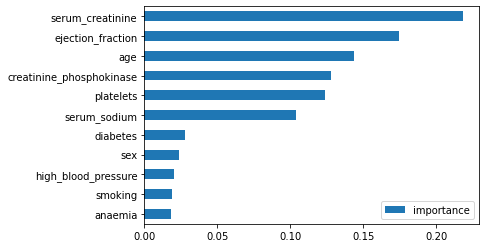

In [8]:
importance_df.plot(kind = 'barh')

In [9]:
importance_df[importance_df['importance'] > importance_df['importance'].mean()].index

Index(['serum_sodium', 'platelets', 'creatinine_phosphokinase', 'age',
       'ejection_fraction', 'serum_creatinine'],
      dtype='object')